 ______________________________________________
 
 #  Spotipy - Visual Analysis
***
 ______________________________________________
 
 ### Utilizing Spotify's API 'spotipy' this notebook will allow for visualization when analyzing artists and tracks  
 
 <br></br>
 <br></br>
 
 **Note:** Before working with this notebook you need to make sure these are true:
 
 - you have registered with Spotify as a developer
 - local conda enviorment has installed each of the required modules

<br></br>

Reference the <a href="https://spotipy.readthedocs.io/en/2.13.0/">spotipy docs</a>, provides a better understanding of the API



Reference <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/">Spotify developer</a>, provides a better understanding of the data stucture

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import collections

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.style as style 

import seaborn as sns

In [2]:
# Public key for the projects spotify developer app
client_id = '5572530ac0664df2b34373f3f41db89b' # May need to insert personal developer key

# Private key for the projects spotify developer app
client_secret = '15734ca0cac44e3c8ee4cc238bc895cf' # May need to insert personal developer key

# A set of strings describing playlist URIs. Playlists are public so no need to aquire authentication 
uri_playlists = ['spotify:playlist:1tdIMWaLOHuzzSOF8DB8Be', # Analogged playlist uri
                 'spotify:playlist:5UYSypfSUpS7a9HOeAJkOf'] # Viscostic playlist uri

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
playlist_1 = pd.DataFrame(sp.playlist_items(uri_playlists[0]))['items']
playlist_2 = pd.DataFrame(sp.playlist_items(uri_playlists[1]))['items']

In [5]:
play_1 = []
play_2 = []
for song in playlist_1:
    play_1.append(song['track']['uri'])

for song in playlist_2:
    play_2.append(song['track']['uri'])

In [6]:
feat_1 = pd.DataFrame(sp.audio_features(play_1))
feat_2 = pd.DataFrame(sp.audio_features(play_2))

In [7]:
# The reference for this styling:
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
style.use('seaborn-poster')
style.use('ggplot')

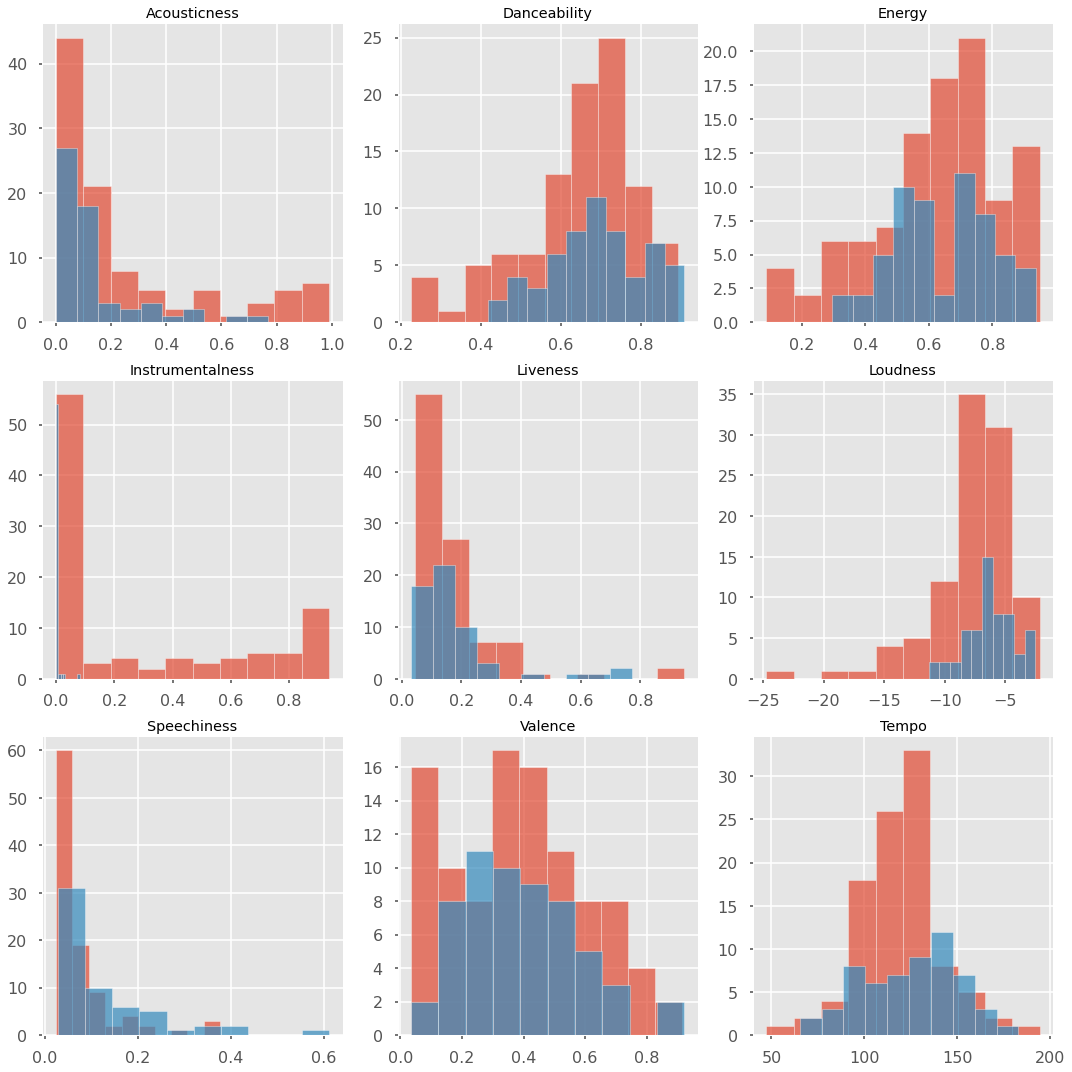

In [8]:
fig1, axs= plt.subplots(figsize=(15,15),nrows=3, ncols=3)
for featured in [feat_1, feat_2]:
    

    axs[0, 0].hist(featured['acousticness'], alpha=0.7, edgecolor='white')
    axs[0, 0].set_title("Acousticness")


    axs[0,1].hist(featured['danceability'], alpha=0.7, edgecolor='white')
    axs[0,1].set_title('Danceability')


    axs[0, 2].hist(featured['energy'], alpha=0.7, edgecolor='white')
    axs[0, 2].set_title('Energy')


    axs[1,0].hist(featured['instrumentalness'], alpha=0.7, edgecolor='white')
    axs[1,0].set_title('Instrumentalness')


    axs[1, 1].hist(featured['liveness'], alpha=0.7, edgecolor='white')
    axs[1, 1].set_title('Liveness')


    axs[1,2].hist(featured['loudness'], alpha=0.7, edgecolor='white')
    axs[1,2].set_title('Loudness')


    axs[2, 0].hist(featured['speechiness'], alpha=0.7, edgecolor='white')
    axs[2, 0].set_title('Speechiness')


    axs[2,1].hist(featured['valence'], alpha=0.7, edgecolor='white')
    axs[2,1].set_title('Valence')

    axs[2,2].hist(featured['tempo'], alpha=0.7, edgecolor='white')
    axs[2,2].set_title('Tempo')


plt.tight_layout()

In [9]:
art_1 = []
art_2 = []
for song in playlist_1:
    art_1.append(pd.DataFrame(song['track']['artists'])['uri'].values)

for song in playlist_2:
    art_2.append(pd.DataFrame(song['track']['artists'])['uri'].values)
    
art_1 = np.unique(np.hstack(art_1))
art_2 = np.unique(np.hstack(art_2))

In [10]:
similar = art_1[np.in1d(art_1, art_2, assume_unique=True)]

similar is a list of the artist uri for all artists shared between the two playlists

In [31]:
[sp.artist(artist)['name'] for artist in similar]

['Tim Gunter',
 'ZHU',
 'Tiësto',
 'Marc E. Bassy',
 'LocateEmilio',
 'graves',
 'Big Gigantic']

A list of the names of the artists that the two playlists have in common 

In [59]:
genres = [sp.artist(artist)['genres'] for artist in similar if len(sp.artist(artist)['genres']) > 0]
genres = [item for elem in genres for item in elem]
bagofwords = collections.Counter(genres)
bagofwords

Counter({'edm': 3,
         'electro house': 2,
         'house': 2,
         'big room': 1,
         'brostep': 1,
         'dance pop': 1,
         'dutch edm': 1,
         'pop': 2,
         'pop dance': 1,
         'trance': 1,
         'tropical house': 1,
         'indie poptimism': 1,
         'pop rap': 1,
         'post-teen pop': 1,
         'rap': 1,
         'bass trap': 1,
         'electronic trap': 2,
         'future bass': 1,
         'pop edm': 1,
         'traprun': 1,
         'vapor twitch': 2,
         'electropop': 1})

Counts the frequency of each genre for the artists in our similarity list

In [11]:
df = sp.recommendations(seed_artists=list(similar[:4]),
                   limit=20)

In [12]:
pd.DataFrame(df['tracks']).loc[:,['name','uri']]

,name,uri
0,Some Things Never Change,spotify:track:5O78ZhnGe8forvVNypAPer
1,Nothing To Lose,spotify:track:3dlVDddut0PTkGTxLHoHmD
2,Another Life (feat. Alida),spotify:track:0NWVFwJxCMjBdTOCePlQdl
3,This Is Real (ft. Ella Henderson),spotify:track:1pRShUtGOG6ZP5fsnw9G4h
4,Naked,spotify:track:2gGLpMzoo80A7jGEIr4ou8
5,Lose Control,spotify:track:0MOkTR1nUs2F0Ux05TUqcR
6,STFU,spotify:track:2p4p9YGwmJIdf5IA9sSWhm
7,...,spotify:track:4zuQk2BtLjRkoIFPgPjAxd
8,Love To Go,spotify:track:14d79QOV2pvJHH9vlUfZwJ
9,Get in Trouble (So What),spotify:track:5KC7ginqShi7mhDQLttQh0


In [13]:
df_tuned = sp.recommendations(seed_artists=list(similar[:4]),
                               limit=20,
                               target_acousticness=0.1,
                               target_danceability=0.66,
                               target_energy=0.63,
                               target_instrumentalness=0.1,
                               target_liveness=0.175,
                               target_loudness=-6.9,
                               target_speechiness=0.1,
                               target_valence=0.39,
                               target_tempo=122)
pd.DataFrame(df_tuned['tracks']).loc[:,['name','uri']]

,name,uri
0,"Me, Myself & I",spotify:track:40YcuQysJ0KlGQTeGUosTC
1,Never Let You Go,spotify:track:523XDGMjH8Gbzc8V6ek5cl
2,All On Me (feat. Zhu),spotify:track:5ad6HGAiatmKHXMI0OSodk
3,Electrify Me,spotify:track:7MkZtFx58ZUBF4RqwOBQwk
4,Halfway (feat. Twan Ray),spotify:track:1BAupWJ7hkJFJuOL0eHb45
5,Good Intentions,spotify:track:0F0iPeQcWyakStJiBEfnbx
6,Summer Days (feat. Macklemore & Patrick Stump ...,spotify:track:7Feaw9WAEREY0DUOSXJLOM
7,i miss u (with Au/Ra),spotify:track:7CH8J4ulT49UfZwSDSkSZA
8,Carry You Home (feat. StarGate & Aloe Blacc),spotify:track:6bolfjXj78EIQRB48C6QTc
9,Ready For Your Love,spotify:track:1y7agAufBsudgRXuq6Ekqb


In [14]:
feat_1['tempo'].mean()

119.96143000000001

In [15]:
feat_2['tempo'].mean()

125.05968965517243

In [16]:
feat_1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')